# Simple stochastic SIR model using ode

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

## Parameters

In [2]:
beta=1.5
gamma=0.15
TS=1.0
ND=70.0
S0=1-1e-6
I0=1e-6
INPUT = (S0, I0, 0.0)

## Model implementation

In [3]:
def diff_eqs(INP,t):
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP    
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

## Simulation

In [4]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

## Ploting

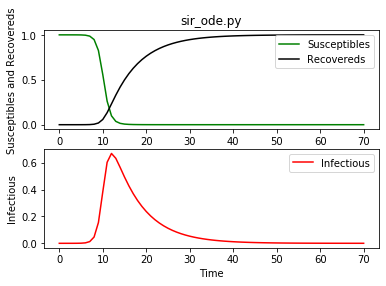

In [7]:
pl.subplot(211)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.legend(loc=0)
pl.title('sir_ode.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles and Recovereds')
pl.subplot(212)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.show()